## Llibreries utilitzades

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from metrics_module import metrics
import numpy as np
from dataloader_module import load_data
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc

## Càrrega i pre-processament de les dades


In [29]:
# Load and preprocess data
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



## Creació i test de la regressió logística

Accuracy: 0.7057
Precision: 0.1313
Recall: 0.7925
F1 Score: 0.2252


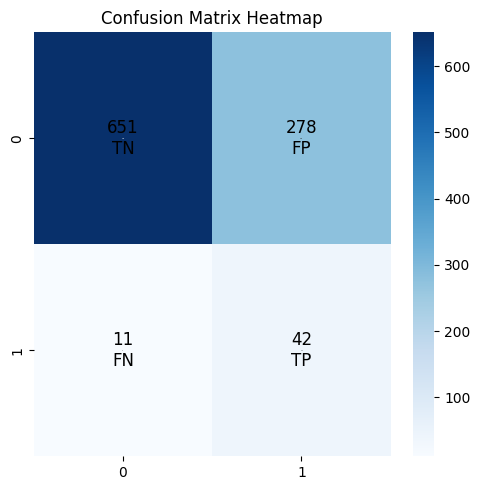

In [30]:
# Entrenar el model Random Forest amb les dades equilibrades
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)

# Obtenir les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= 0.07).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_random_forest.npy', y_pred)

# Avaluar el model
accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)


## ROC Curve i AUC

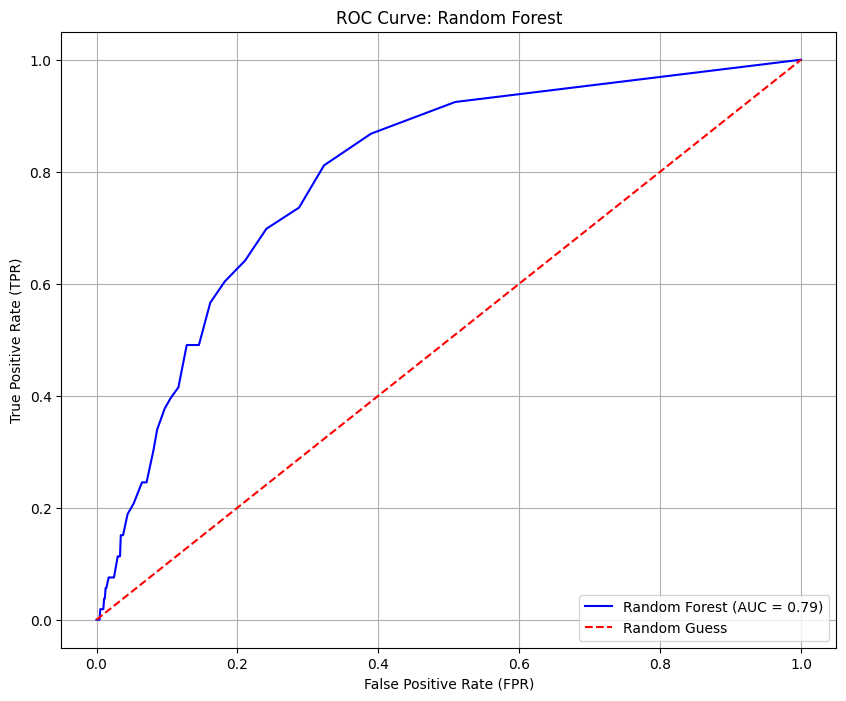

Random Forest AUC Score: 0.79


In [31]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Random Forest")